In [54]:
import pandas as pd
pd.set_option('display.max_row', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import json

import seaborn as sns
sns.set_style('darkgrid')

In [55]:
with open('fake_ds.json') as f:
    mylist =f.readlines() 

In [56]:
data = mylist[-1]

AttributeError: 'str' object has no attribute 'head'

In [57]:
data1 = data.replace("'[",'')
data1 = data1.replace("]'",'')

In [58]:
df = pd.read_json(data1)

In [70]:
df.head()

,preds,time
0,"[{'neutral': 0.402660727500915, 'happy': 0.011...",35.26
1,[],35.28
2,[],35.30
3,"[{'neutral': 0.9807662963867181, 'happy': 0.01...",35.32
4,"[{'neutral': 0.9667119979858391, 'happy': 0.03...",35.34


In [60]:
list_of_dict = []
for j in range(len(df)):
    for i in range(len(df.loc[j].preds)):
        item = {}
        time = df.iloc[j].time
        item['time'] = time
        for key, value in df.loc[j].preds[i].items():
            item[key] = value
        list_of_dict.append(item)

wrangled_df = pd.DataFrame(list_of_dict)


In [65]:
for elem in range(len(wrangled_df.time)):
    wrangled_df.time[elem] = str(wrangled_df.time[elem]).replace('.',':')
    

/home/stanislas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
wrangled_df.head()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
0,0.0,0.0,0.02,0.01,0.40,0.56,0.00,35:26
1,0.0,0.0,0.00,0.01,0.98,0.01,0.00,35:32
2,0.0,0.0,0.00,0.03,0.97,0.00,0.00,35:34
3,0.0,0.0,0.30,0.23,0.31,0.11,0.05,35:36
4,0.0,0.0,0.01,0.02,0.75,0.22,0.00,35:38


In [91]:
col = list(wrangled_df.columns)
col= col[:-1]
print(col)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [96]:
decimals = 2
for c in col:
    wrangled_df[f"{c}"] = wrangled_df[f"{c}"].apply(lambda x: round(x, decimals))
print(wrangled_df.head())

   angry  disgusted  fearful  happy  neutral   sad  surprised   time
0    0.0        0.0     0.02   0.01     0.40  0.56       0.00  35:26
1    0.0        0.0     0.00   0.01     0.98  0.01       0.00  35:32
2    0.0        0.0     0.00   0.03     0.97  0.00       0.00  35:34
3    0.0        0.0     0.30   0.23     0.31  0.11       0.05  35:36
4    0.0        0.0     0.01   0.02     0.75  0.22       0.00  35:38


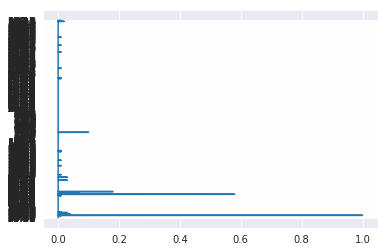

In [125]:
plt.plot(wrangled_df['angry'],wrangled_df['time'])
plt.show()

In [155]:
wrangled_df.drop_duplicates(subset=['time'], keep='last',inplace=True)
wrangled_df.tail()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
1551,0.00,0.0,0.02,0.00,0.00,0.00,0.98,35:12
1552,0.01,0.0,0.03,0.00,0.14,0.01,0.80,35:14
1553,0.01,0.0,0.01,0.01,0.14,0.00,0.84,35:16
1554,0.00,0.0,0.04,0.00,0.01,0.00,0.95,35:18
1555,0.00,0.0,0.00,0.00,0.00,0.00,1.00,35:2


In [121]:
mask = (wrangled_df.time == '49:0')
wrangled_df[mask]

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
328,0.03,0.0,0.0,0.03,0.87,0.07,0.0,49:0


In [135]:
wrangled_df.to_csv('fake4.csv', index = None)

In [136]:
newdf = pd.read_csv('fake4.csv')
newdf.tail()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
1444,0.00,0.0,0.02,0.00,0.00,0.00,0.98,35:12
1445,0.01,0.0,0.03,0.00,0.14,0.01,0.80,35:14
1446,0.01,0.0,0.01,0.01,0.14,0.00,0.84,35:16
1447,0.00,0.0,0.04,0.00,0.01,0.00,0.95,35:18
1448,0.00,0.0,0.00,0.00,0.00,0.00,1.00,35:2


In [137]:
mask = (newdf.time == '49:0')
newdf[mask]

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
298,0.03,0.0,0.0,0.03,0.87,0.07,0.0,49:0


In [150]:
newdf['hour'] = '09:'

In [151]:
newdf.head()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time,hour,date
0,0.0,0.0,0.02,0.01,0.40,0.56,0.00,35:26,09:,9:35:26
1,0.0,0.0,0.00,0.01,0.98,0.01,0.00,35:32,09:,9:35:32
2,0.0,0.0,0.00,0.03,0.97,0.00,0.00,35:34,09:,9:35:34
3,0.0,0.0,0.30,0.23,0.31,0.11,0.05,35:36,09:,9:35:36
4,0.0,0.0,0.01,0.02,0.75,0.22,0.00,35:38,09:,9:35:38


In [152]:
newdf['date'] = newdf.hour.str.cat(newdf.time)

In [154]:
newdf.tail()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time,hour,date
1444,0.00,0.0,0.02,0.00,0.00,0.00,0.98,35:12,09:,09:35:12
1445,0.01,0.0,0.03,0.00,0.14,0.01,0.80,35:14,09:,09:35:14
1446,0.01,0.0,0.01,0.01,0.14,0.00,0.84,35:16,09:,09:35:16
1447,0.00,0.0,0.04,0.00,0.01,0.00,0.95,35:18,09:,09:35:18
1448,0.00,0.0,0.00,0.00,0.00,0.00,1.00,35:2,09:,09:35:2


In [156]:
toConcat = pd.read_csv('filetoconcat2.csv')
toConcat.head()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time
0,0.0,0.0,0.0,0.72,0.27,0.01,0.0,0:0
1,0.0,0.0,0.0,0.28,0.72,0.00,0.0,0:6
2,0.0,0.0,0.0,0.16,0.83,0.01,0.0,0:8
3,0.0,0.0,0.0,0.78,0.22,0.00,0.0,0:1
4,0.0,0.0,0.0,0.32,0.67,0.01,0.0,0:12


In [157]:
toConcat['hour']= '10:'
toConcat['date'] = toConcat.hour.str.cat(toConcat.time)

In [158]:
toConcat.head()

,angry,disgusted,fearful,happy,neutral,sad,surprised,time,hour,date
0,0.0,0.0,0.0,0.72,0.27,0.01,0.0,0:0,10:,10:0:0
1,0.0,0.0,0.0,0.28,0.72,0.00,0.0,0:6,10:,10:0:6
2,0.0,0.0,0.0,0.16,0.83,0.01,0.0,0:8,10:,10:0:8
3,0.0,0.0,0.0,0.78,0.22,0.00,0.0,0:1,10:,10:0:1
4,0.0,0.0,0.0,0.32,0.67,0.01,0.0,0:12,10:,10:0:12
